In [15]:
import collections
import itertools
import json
import datetime
import time

#import ijson
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import tqdm

In [47]:
language = "python"
path_to_lib = f"data/results/{language}"

In [30]:
with open(f"{path_to_lib}/{language}_post_to_libs.json") as handle:
    post_to_libs = json.load(handle)
    
with open(f"{path_to_lib}/{language}_all_libs_dates.json") as handle:
    all_libs_dates = json.load(handle)
    
with open(f"{path_to_lib}/{language}_all_pairs_dates.json") as handle:
    all_pairs_dates = json.load(handle)

Segments formed (took 2.5 seconds).
Fits performed (took 1.85 seconds).
Fit performed; alpha=1.5024845014162147 c=2.1592624179327177e-06


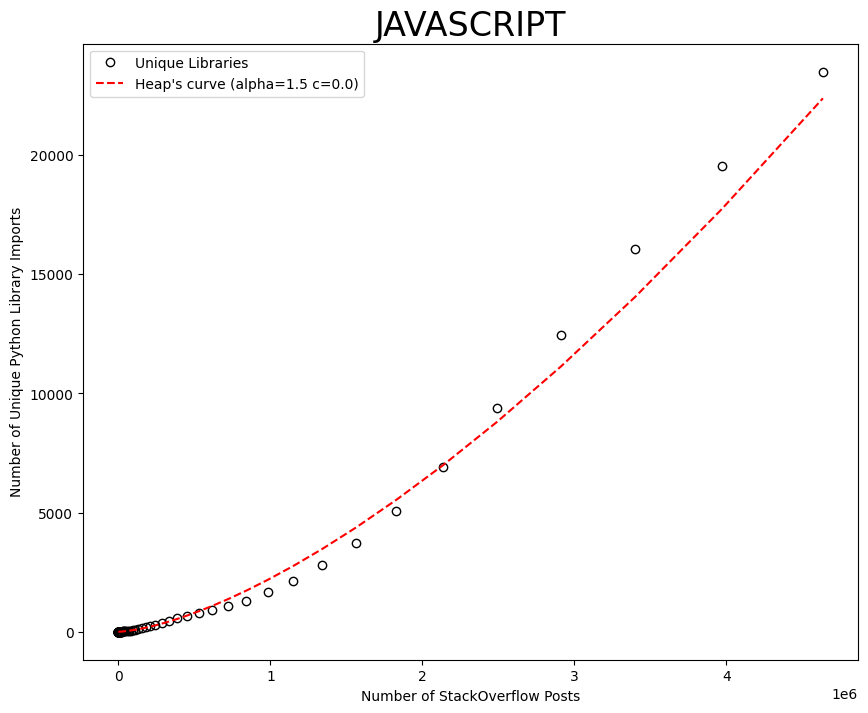

In [31]:
t0 = time.time()
xs_libs = np.array([d[0] for d in post_to_libs['distinct_libs_plot']])
ys_libs = np.array([d[1] for d in post_to_libs['distinct_libs_plot']])
xs_pairs = [d[0] for d in post_to_libs['distinct_pairs_plot']]
ys_pairs = [d[1] for d in post_to_libs['distinct_pairs_plot']]
t1 = time.time()
print(f"Segments formed (took {round(t1 - t0, 2)} seconds).")

# Unique libs line fit
libs_a, libs_b  = np.polyfit(range(len(xs_libs)), ys_libs, 1)
pairs_a, pairs_b = np.polyfit(range(len(xs_pairs)), ys_pairs, 1)
t2 = time.time()
print(f"Fits performed (took {round(t2 - t1, 2)} seconds).")

###########################
from sklearn.linear_model import LinearRegression
libs_count = [d[1] for d in post_to_libs['distinct_libs_plot']]
xs = np.array(range(1, len(libs_count)+1))
xs_transformed = np.log(xs).reshape(-1 ,1 )
counts_transformed = np.log(np.array(libs_count) + 1)

model = LinearRegression()
model.fit(xs_transformed, counts_transformed)

alpha = model.coef_[0]
log_c = model.intercept_
c = np.exp(log_c)
print(f"Fit performed; alpha={alpha} c={c}")
############################


step_size = 1 #len(xs_libs) // 1000
plt.figure(figsize=(10,8))
#xs = np.array(range(0, len(xs_libs), step_size))

xs = [int(x) for x in np.geomspace(1, len(xs_libs)-1, 100)]
#plt.plot(xs, [ys_pairs[i] for i in xs], "^", color="blue", markerfacecolor='none',  label="Unique Pairs")
plt.plot(xs, [ys_libs[i] for i in xs],"o", color="black", markerfacecolor='none', label="Unique Libraries")
plt.plot(xs, [c*x**alpha for x in xs], "--", color="red", label=f"Heap's curve (alpha={round(alpha, 2)} c={round(c, 2)})")

# plt.xticks(fontsize=12)
plt.title(f"{language.upper()}", fontsize=24)
plt.xlabel("Number of StackOverflow Posts", fontsize=10)
plt.ylabel("Number of Unique Python Library Imports", fontsize=10)
plt.legend()


[]

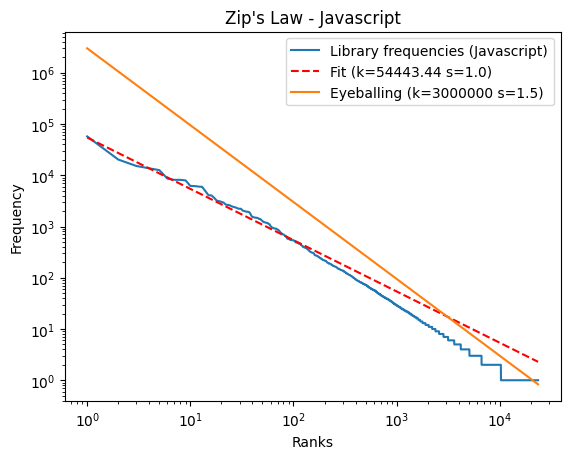

In [32]:
from scipy.optimize import curve_fit

libs_freq = {k:len(v) for k, v in all_libs_dates.items()}
sorted_libs_freq = sorted(libs_freq.items(), key=lambda x: x[1], reverse=True)
sorted_libs_freq_values = [x[1] for x in sorted_libs_freq]

xs = range(1, len(sorted_libs_freq) + 1)
plt.plot(xs, sorted_libs_freq_values, label=f"Library frequencies ({language.capitalize()})")
#plt.loglog()


ranks = np.arange(1, len(sorted_libs_freq_values) + 1)
frequencies = np.array(sorted_libs_freq_values)

def zipf(rank, s, k):
    return k / (rank ** s)

# k / (n ** s)
(s, k), cov = curve_fit(zipf, ranks, frequencies)
fitted_frequencies = zipf(ranks, s, k)
plt.plot(xs, fitted_frequencies, "r--", label=f"Fit (k={round(k, 2)} s={round(s, 2)})")

eye_k = 3_000_000
eye_s = 1.5
plt.plot(xs, [eye_k / (x**eye_s) for x in xs], label=f"Eyeballing (k={eye_k} s={eye_s})")
plt.legend()
plt.xlabel("Ranks")
plt.ylabel("Frequency")
plt.title(f"Zip's Law - {language.capitalize()}")
plt.loglog()

# Subplots depicting all the languages

## Heaps's Law

Processing python
	 Opening resources...
	...done.
	Segments formed (took 2.23 seconds).
	Fits performed (took 1.64 seconds).
	Fit performed; alpha=0.7726914639879424 c=0.4575875427835869
Processing r
	 Opening resources...
	...done.
	Segments formed (took 0.72 seconds).
	Fits performed (took 0.35 seconds).
	Fit performed; alpha=0.7499535771636501 c=0.30259526666411735
Processing javascript
	 Opening resources...
	...done.
	Segments formed (took 2.81 seconds).
	Fits performed (took 2.25 seconds).
	Fit performed; alpha=1.5024845014162147 c=2.1592624179327177e-06
Processing java
	 Opening resources...
	...done.
	Segments formed (took 1.88 seconds).
	Fits performed (took 1.36 seconds).
	Fit performed; alpha=0.8781125702872805 c=0.0127990946532085
Processing cpp
	 Opening resources...
	...done.
	Segments formed (took 0.74 seconds).
	Fits performed (took 0.47 seconds).
	Fit performed; alpha=0.995256187210611 c=0.032904934659703476


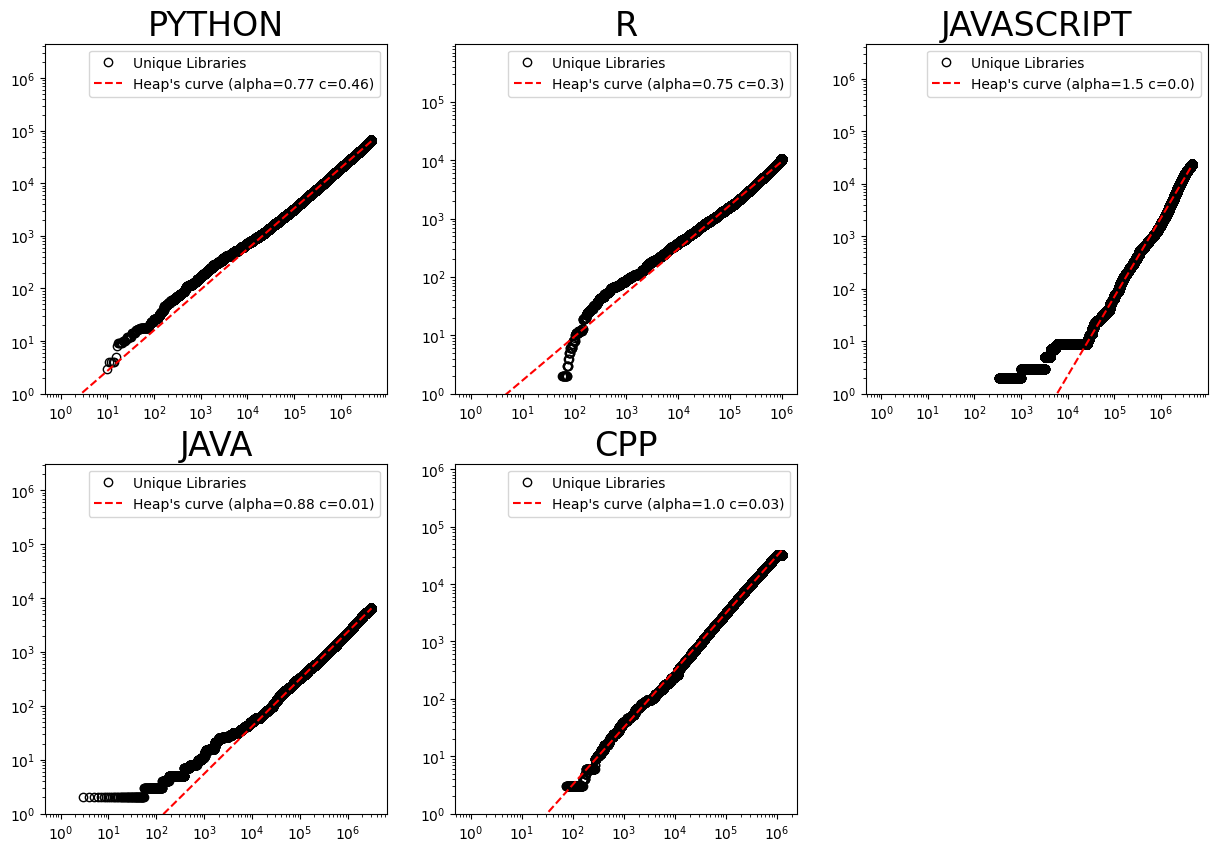

In [40]:
LANGUAGES = [
    "python",
    "r",
    "javascript",
    "java",
    "cpp",
    #"php",
]
fig = plt.figure(figsize=(15, 10))
rows, columns = 2, 3
gs = GridSpec(rows, columns, figure=fig)

for index, language in enumerate(LANGUAGES):
    print(f"Processing {language}")
    path_to_lib = f"data/results/{language}"

    i, j = index //  columns, index % columns
    ax = fig.add_subplot(gs[i, j])
    
    print("\t Opening resources...")
    with open(f"{path_to_lib}/{language}_post_to_libs.json") as handle:
        post_to_libs = json.load(handle)
    
    with open(f"{path_to_lib}/{language}_all_libs_dates.json") as handle:
        all_libs_dates = json.load(handle)
        
    with open(f"{path_to_lib}/{language}_all_pairs_dates.json") as handle:
        all_pairs_dates = json.load(handle)
    print("\t...done.")

    t0 = time.time()
    xs_libs = np.array([d[0] for d in post_to_libs['distinct_libs_plot']])
    ys_libs = np.array([d[1] for d in post_to_libs['distinct_libs_plot']])
    xs_pairs = [d[0] for d in post_to_libs['distinct_pairs_plot']]
    ys_pairs = [d[1] for d in post_to_libs['distinct_pairs_plot']]
    t1 = time.time()
    print(f"\tSegments formed (took {round(t1 - t0, 2)} seconds).")
    
    # Unique libs line fit
    libs_a, libs_b  = np.polyfit(range(len(xs_libs)), ys_libs, 1)
    pairs_a, pairs_b = np.polyfit(range(len(xs_pairs)), ys_pairs, 1)
    t2 = time.time()
    print(f"\tFits performed (took {round(t2 - t1, 2)} seconds).")
    
    ###########################
    from sklearn.linear_model import LinearRegression
    libs_count = [d[1] for d in post_to_libs['distinct_libs_plot']]
    xs = np.array(range(1, len(libs_count)+1))
    xs_transformed = np.log(xs).reshape(-1 ,1 )
    counts_transformed = np.log(np.array(libs_count) + 1)
    
    model = LinearRegression()
    model.fit(xs_transformed, counts_transformed)
    
    alpha = model.coef_[0]
    log_c = model.intercept_
    c = np.exp(log_c)
    print(f"\tFit performed; alpha={alpha} c={c}")
    ############################
    
    
    step_size = 1 #len(xs_libs) // 1000
    #xs = np.array(range(0, len(xs_libs), step_size))
    
    #xs = [int(x) for x in np.geomspace(1, len(xs_libs)-1, 100)]
    xs = list(range(len(xs_libs)))
    #plt.plot(xs, [ys_pairs[i] for i in xs], "^", color="blue", markerfacecolor='none',  label="Unique Pairs")
    ax.loglog(xs, [ys_libs[i] for i in xs],"o", color="black", markerfacecolor='none', label="Unique Libraries")
    ax.loglog(xs, [c*x**alpha for x in xs], "--", color="red", label=f"Heap's curve (alpha={round(alpha, 2)} c={round(c, 2)})")
    
    ax.set_ylim(1, len(xs_libs))
    ax.set_title(f"{language.upper()}", fontsize=24)
    ax.legend()


## Zip's

Processing python
	 Opening resources...
	...done.
Processing r
	 Opening resources...
	...done.
Processing javascript
	 Opening resources...
	...done.
Processing java
	 Opening resources...
	...done.
Processing cpp
	 Opening resources...
	...done.


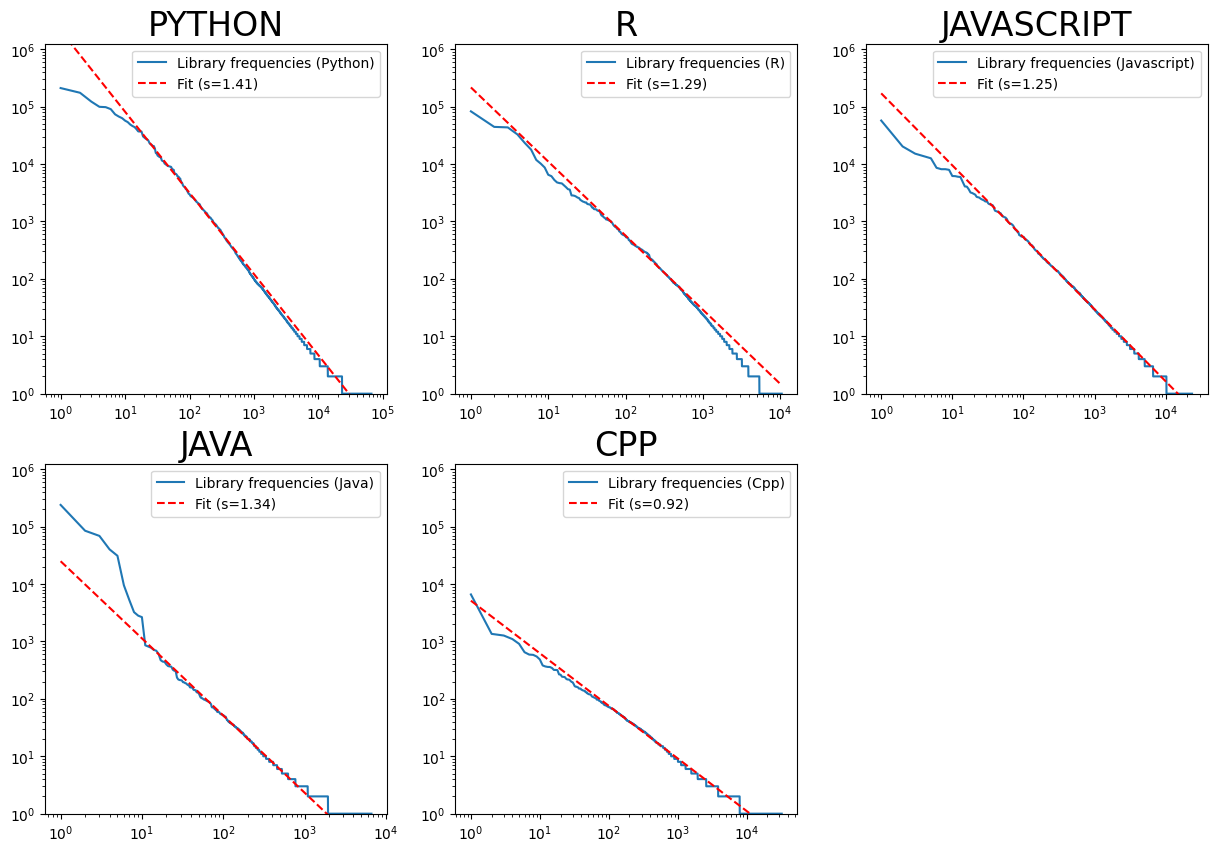

In [46]:
from scipy.optimize import curve_fit


LANGUAGES = [
    "python",
    "r",
    "javascript",
    "java",
    "cpp",
    #"php",
]
fig = plt.figure(figsize=(15, 10))
rows, columns = 2, 3
gs = GridSpec(rows, columns, figure=fig)

for index, language in enumerate(LANGUAGES):
    print(f"Processing {language}")
    path_to_lib = f"data/results/{language}"

    i, j = index //  columns, index % columns
    ax = fig.add_subplot(gs[i, j])


    print("\t Opening resources...")
    with open(f"{path_to_lib}/{language}_post_to_libs.json") as handle:
        post_to_libs = json.load(handle)
    
    with open(f"{path_to_lib}/{language}_all_libs_dates.json") as handle:
        all_libs_dates = json.load(handle)
        
    with open(f"{path_to_lib}/{language}_all_pairs_dates.json") as handle:
        all_pairs_dates = json.load(handle)
    print("\t...done.")

    libs_freq = {k:len(v) for k, v in all_libs_dates.items()}
    sorted_libs_freq = sorted(libs_freq.items(), key=lambda x: x[1], reverse=True)
    sorted_libs_freq_values = [x[1] for x in sorted_libs_freq]
    
    xs = range(1, len(sorted_libs_freq) + 1)
    ax.loglog(xs, sorted_libs_freq_values, label=f"Library frequencies ({language.capitalize()})")
    
    
    ranks = np.arange(1, len(sorted_libs_freq_values) + 1)
    frequencies = np.array(sorted_libs_freq_values)
    
    def zipf(rank, s, k):
        return k / (rank ** s)
    
    # k / (n ** s)

    # find a relevant region for the fit
    region_start = 100
    region_end = 1000
    
    (s, k), cov = curve_fit(
        zipf,
        ranks[region_start:region_end],
        frequencies[region_start:region_end],
    )
    fitted_frequencies = zipf(ranks, s, k)
    ax.loglog(xs, fitted_frequencies, "r--", label=f"Fit (s={round(s, 2)})")
    ax.set_ylim(1, len(xs_libs))
    ax.set_title(f"{language.upper()}", fontsize=24)
    ax.legend()
   